In [587]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [588]:
from geopy.distance import geodesic as GD 
from geopy.distance import great_circle as GC 

In [589]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from catboost import CatBoostRegressor
from xgboost import XGBRegressor, XGBRFRegressor

# Введение

Импортируем датасет

In [590]:
df = pd.read_csv(r"D:\Курсы\flats.csv")

In [591]:
df.head()

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
0,3500.0,240,56.365696,43.820250,Resale,9.0,Brick,3.0,4.0,60.0
1,4000.0,240,56.323057,44.007862,Resale,3.0,Brick,3.0,3.0,57.0
2,2150.0,240,56.267552,43.892107,Resale,5.0,Panel,2.0,1.0,38.0
3,3100.0,240,56.359963,43.813756,Resale,5.0,Panel,4.0,2.0,59.0
4,3585.0,240,56.325374,43.937463,Resale,9.0,Panel,2.0,7.0,52.5


In [592]:
df.shape

(72379, 10)

Посмотрим нулевые значения

In [593]:
df.isna().sum()

Price        0
Date         0
Lat          0
Lng          0
Type        17
Floors      17
Building    17
Rooms       17
Floor       17
Area        17
dtype: int64

Посмотрим типы признаков

In [594]:
df.dtypes

Price       float64
Date          int64
Lat         float64
Lng         float64
Type         object
Floors      float64
Building     object
Rooms       float64
Floor       float64
Area        float64
dtype: object

# Работа с данными

## Удаление null-значений и дубликатов

Посмотрим поподробнее на Nan значения

In [595]:
df[df.Type.isna()]

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
4777,1400.0,56,56.326783,44.002687,NaN,NaN,NaN,NaN,NaN,NaN
4778,3000.0,57,56.229416,43.946365,NaN,NaN,NaN,NaN,NaN,NaN
4824,4950.0,62,56.283934,44.035397,NaN,NaN,NaN,NaN,NaN,NaN
4826,4100.0,56,56.341398,43.841083,NaN,NaN,NaN,NaN,NaN,NaN
4827,2900.0,56,56.272180,43.933501,NaN,NaN,NaN,NaN,NaN,NaN
4852,2400.0,56,56.327955,43.849715,NaN,NaN,NaN,NaN,NaN,NaN
5813,6000.0,62,56.283864,44.075417,NaN,NaN,NaN,NaN,NaN,NaN
5814,2350.0,62,56.326604,43.932114,NaN,NaN,NaN,NaN,NaN,NaN
6681,2950.0,62,56.348068,43.908636,NaN,NaN,NaN,NaN,NaN,NaN
6682,2390.0,63,56.201114,43.810028,NaN,NaN,NaN,NaN,NaN,NaN


Удалим эти объекты

In [596]:
df.dropna(inplace=True)

Проверим объекты на полные дубликаты

In [597]:
df[df.duplicated()].shape

(1210, 10)

В нашем датасете целых 1210 дубликатов!

Избавимся от них

In [598]:
df = df.drop_duplicates().reset_index(drop=True)

## Распределение целевой переменной (Price)

Как мы видим, почти все квартиры смещены влево и заметны выбросы

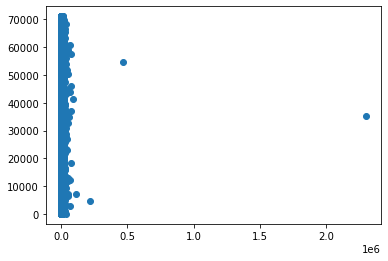

In [599]:
plt.scatter(x=df.Price, y=np.arange(len(df)))

Детальнее рассмотрим аномальные квартиры

In [600]:
df.sort_values(by='Price', ascending=False).head(20)

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
35262,2300000.000,230,56.297613,44.042296,Resale,5.0,Brick,1.0,4.0,31.00
54859,468400.032,362,56.365840,43.825336,Resale,19.0,Brick,3.0,19.0,79.40
4815,216000.016,65,56.234177,43.956104,Resale,5.0,Brick,1.0,1.0,32.00
7027,111111.112,158,56.218230,43.841084,Resale,12.0,Brick,2.0,5.0,59.00
41273,87639.840,343,56.319618,43.949852,Resale,3.0,Brick,2.0,2.0,48.00
18375,75000.000,109,56.320168,43.996975,Resale,5.0,Brick,2.0,1.0,85.00
36916,72612.000,270,56.325340,44.016773,Resale,10.0,Brick,2.0,7.0,80.68
57623,70900.001,293,56.313139,44.014395,New,17.0,Brick,3.0,6.0,97.00
46011,70900.001,316,56.313139,44.014395,New,17.0,Brick,3.0,6.0,97.00
12355,68000.000,146,56.318086,43.985478,Resale,2.0,Wooden,2.0,1.0,52.00


Посмотрим детальнее квартиры у которых маленькая площадь и высокая цена

У самой дорогой квартиры очень маленькая площадь, посмотрим на её расположение

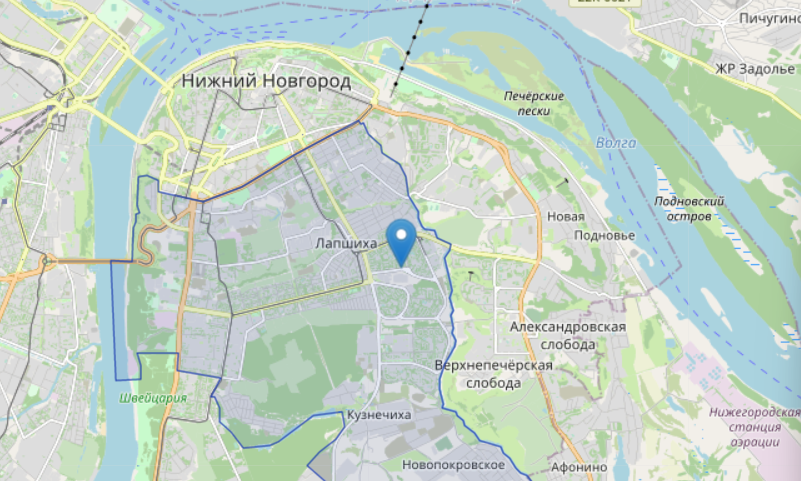

Эта квартира находится Советском районе, напротив ТЦ, не думаю, что из-за этого она такая дорогая

Посмотрим рейтинг районов Нижнего Новгорода

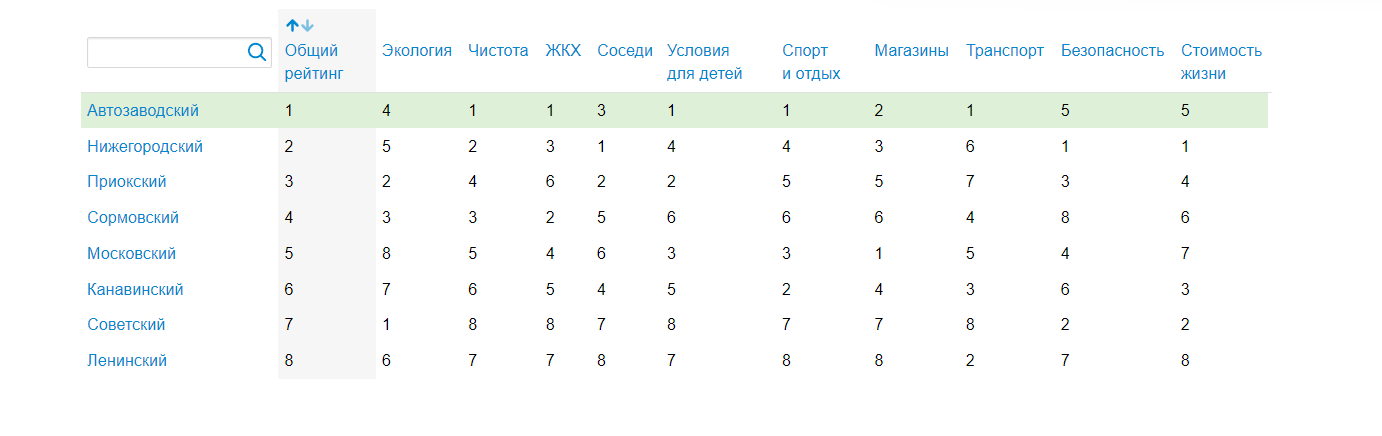

Эта квартира не находится в самых лучших, скорее всего это выброс, удалим её

In [601]:
df = df.drop(35262).reset_index(drop=True)

Посмотрим остальные две квартиры

In [602]:
df.iloc[[54858]]

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
54858,468400.032,362,56.36584,43.825336,Resale,19.0,Brick,3.0,19.0,79.4


Эта квартира находится в Сормовском районе, а этот район не является самый лучшим в общем рейтинге

Также у этой квартиры не самая большая площадь

Удалим эту квартиру 

In [603]:
df = df.drop(54858).reset_index(drop=True)

Посмотрим на третью квартиру 

In [604]:
df.iloc[[4815]]

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
4815,216000.016,65,56.234177,43.956104,Resale,5.0,Brick,1.0,1.0,32.0


Эта квартира находится в микрорайоне, которого нет в списке

Также у этой квартиры маленькая площадь

Удалим её

In [605]:
df = df.drop(4815).reset_index(drop=True)

Посмотрим остальные квартиры у которых маленькая площадь и большая цена

In [606]:
df.sort_values(by='Price', ascending=False).head(25)

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
7026,111111.112,158,56.218230,43.841084,Resale,12.0,Brick,2.0,5.0,59.00
41271,87639.840,343,56.319618,43.949852,Resale,3.0,Brick,2.0,2.0,48.00
18374,75000.000,109,56.320168,43.996975,Resale,5.0,Brick,2.0,1.0,85.00
36914,72612.000,270,56.325340,44.016773,Resale,10.0,Brick,2.0,7.0,80.68
46009,70900.001,316,56.313139,44.014395,New,17.0,Brick,3.0,6.0,97.00
57620,70900.001,293,56.313139,44.014395,New,17.0,Brick,3.0,6.0,97.00
12354,68000.000,146,56.318086,43.985478,Resale,2.0,Wooden,2.0,1.0,52.00
43897,65000.000,347,56.328124,44.021276,Resale,6.0,Brick,3.0,5.0,180.00
60805,65000.000,347,56.327316,44.014053,Resale,4.0,Brick,3.0,3.0,85.00
2837,63504.300,246,56.312300,43.997154,Resale,5.0,Brick,5.0,3.0,280.00


Возможно, есть внешние факторы, из-за которых цена столь высока

In [607]:
df = df.drop([7026, 41271, 18374, 36914, 46009, 57620, 12354, 60805, 11960, 43873]).reset_index(drop=True)

Также посмотрим квартиры с минимальными стоимостями

In [608]:
df.sort_values(by='Price', ascending=True).head(20)

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
29913,0.001,206,56.262100,43.855770,Resale,9.0,Brick,3.0,4.0,57.0
21328,0.001,195,56.247778,43.878333,Resale,5.0,Brick,3.0,2.0,78.0
69289,0.005,370,56.311901,44.075723,Resale,5.0,Brick,4.0,3.0,60.0
21515,0.011,185,56.233562,43.822388,Resale,9.0,Brick,2.0,2.0,45.0
26393,0.580,177,56.324463,44.001888,Resale,2.0,Brick,1.0,2.0,30.6
26980,0.700,172,56.015904,44.391426,Resale,2.0,Brick,2.0,1.0,42.0
29039,0.890,153,56.263248,43.974121,Resale,10.0,Brick,1.0,8.0,70.0
23816,0.999,171,56.324463,44.001888,Resale,5.0,Brick,2.0,3.0,55.0
3433,1.000,286,56.292278,44.008044,Resale,3.0,Brick,1.0,1.0,28.4
6008,1.000,129,56.324463,44.001888,Resale,14.0,Brick,2.0,3.0,58.0


Тут мы видим квартиры с очень низкой ценой и с нормальной площадью

Также эти квартиры находятся в хороших районах Нижнего Новгорода (Автозаводском и Нижегородском)

Неизвестно почему они так дешево стоят

Удалим первые четыре квартиры

In [609]:
df = df.drop([29913, 21328, 69289, 21515]).reset_index(drop=True)

После очистки данных, график распределения цены выглядит так

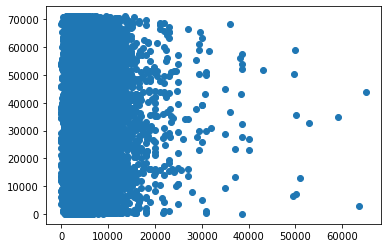

In [610]:
plt.scatter(x=df.Price, y=np.arange(len(df)))

## Распределение площади (Area)

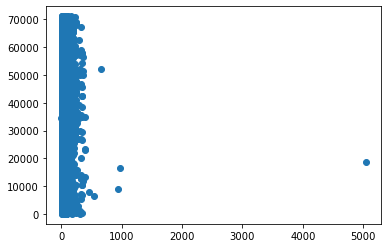

In [611]:
plt.scatter(x=df.Area, y=np.arange(len(df)))

Посмотрим внимательнее квартиру с максимальной площадью

In [612]:
df.sort_values(by='Area', ascending=False).head(10)

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
18703,2700.000,122,56.313889,43.995000,Resale,3.0,Brick,3.0,3.0,5039.0
16700,25000.000,360,56.247280,43.840400,Resale,1.0,Brick,1.0,1.0,970.0
8889,5508.240,141,56.263612,44.021545,Resale,19.0,Monolithic,4.0,15.0,938.0
52236,3855.965,289,56.301394,43.947713,New,23.0,Brick,3.0,12.0,652.0
6570,49500.000,65,56.329037,44.014797,Resale,8.0,Brick,5.0,7.0,549.0
7862,28000.000,115,56.344627,43.865555,Resale,5.0,Brick,1.0,1.0,462.8
22887,40000.000,95,56.318954,43.998547,Resale,6.0,Brick,5.0,5.0,400.0
23510,37000.000,191,56.318954,43.998547,Resale,5.0,Brick,5.0,5.0,400.0
13211,37000.000,358,56.318955,43.998548,Resale,6.0,Brick,5.0,5.0,400.0
34766,7500.000,214,56.281546,43.899267,Resale,1.0,Brick,5.0,1.0,400.0


Как мы видим, у этой квартиры аномально высокая площадь и низкая цена в сравнении с остальными квартирами, эта квартира находится в самом центре городе

Удалим эту квартиру

In [613]:
df = df.drop(18703).reset_index(drop=True)

Посмотрим остальные квартиры с наименьшими площадями 

In [615]:
df.sort_values(by='Area', ascending=True).head(10)

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
34478,770.0,239,56.293322,44.024546,Resale,5.0,Brick,1.0,4.0,1.0
10669,1400.0,99,56.324463,44.001888,Resale,2.0,Brick,1.0,2.0,5.0
7711,1400.0,106,56.324463,44.001888,Resale,2.0,Brick,1.0,2.0,5.0
53668,5222.4,316,56.297178,44.085703,Resale,17.0,Brick,2.0,9.0,6.0
18433,550.0,108,56.324463,44.001888,Resale,4.0,Brick,2.0,4.0,8.6
60593,900.0,341,56.316629,43.869254,Resale,2.0,Brick,1.0,1.0,10.0
45562,1500.0,319,56.283824,44.050947,Resale,5.0,Brick,1.0,5.0,11.5
5216,975.0,343,56.310947,44.033466,Resale,5.0,Brick,1.0,5.0,12.0
57068,700.0,290,56.349340,43.872254,Resale,9.0,Panel,1.0,4.0,12.0
61937,700.0,333,56.255447,43.970144,Resale,9.0,Brick,1.0,6.0,12.0


Удалим первые квартиру, потому что у неё слишком малеьнкая площадь

Вторая квартира совпадает с третьей по долготе и широте, а также у них слишком маленькие площади

И удалим четвертую квартиру, потому что у неё слишком высокая цена за маленькую площадь

In [616]:
df = df.drop([34478, 10669, 7711, 53668, 18433]).reset_index(drop=True)

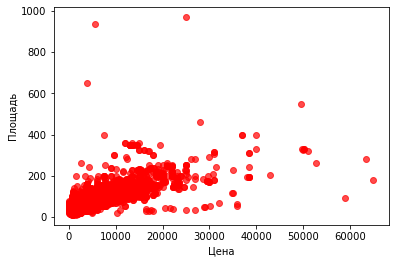

In [617]:
plt.xlabel('Цена')
plt.ylabel('Площадь')
plt.scatter(df.Price, y=df.Area, c='red', alpha=0.7);

Посмотрим на квартиры с аномально большой площадью ещё раз

In [618]:
df.sort_values(by='Area', ascending=False).head(20)

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
16698,25000.000,360,56.247280,43.840400,Resale,1.0,Brick,1.0,1.0,970.0
8888,5508.240,141,56.263612,44.021545,Resale,19.0,Monolithic,4.0,15.0,938.0
52231,3855.965,289,56.301394,43.947713,New,23.0,Brick,3.0,12.0,652.0
6570,49500.000,65,56.329037,44.014797,Resale,8.0,Brick,5.0,7.0,549.0
7861,28000.000,115,56.344627,43.865555,Resale,5.0,Brick,1.0,1.0,462.8
22883,40000.000,95,56.318954,43.998547,Resale,6.0,Brick,5.0,5.0,400.0
23506,37000.000,191,56.318954,43.998547,Resale,5.0,Brick,5.0,5.0,400.0
13209,37000.000,358,56.318955,43.998548,Resale,6.0,Brick,5.0,5.0,400.0
34761,7500.000,214,56.281546,43.899267,Resale,1.0,Brick,5.0,1.0,400.0
56589,12000.000,353,56.287662,44.065554,Resale,4.0,Brick,5.0,3.0,360.0


Здесь мы видим три квартиры у которых большая площадь и низкая цена, рассмотрим их поподробнее (квартиры: 8888, 52232, 34762)

Первая квартира находится в жилом комплексе, далеко от центра, оставим её

Вторая квартира относительно близко к центру и она новая, удалим её

Третья квартира находится далеко от центра, оставим её

In [619]:
df = df.drop([8888, 52231]).reset_index(drop=True)

## Распределение этажей квартир (Floor)

Распределение количества квартир по этажам

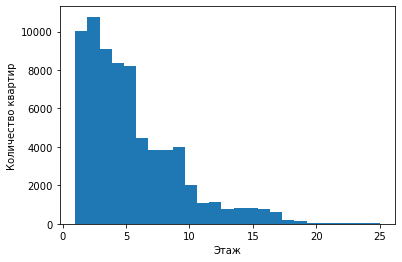

In [620]:
plt.xlabel("Этаж")
plt.ylabel("Количество квартир")
plt.hist(df.Floor,  bins=len(df.Floor.unique()));

Как мы видим, большинство квартир находят в на первых пяти этажах, а потом количество квартир уменьшается

Построим график зависимости цены от этажа на котором находится квартира

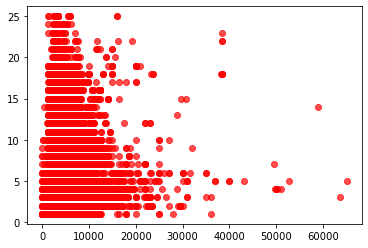

In [621]:
plt.scatter(df.Price, y=df.Floor, c='red', alpha=0.7);

Посмотрим внимательнее на три квартиры с максимальной стоимостью

In [622]:
df.sort_values(by='Price', ascending=False).head(20)

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
43881,65000.0,347,56.328124,44.021276,Resale,6.0,Brick,3.0,5.0,180.00
2837,63504.3,246,56.312300,43.997154,Resale,5.0,Brick,5.0,3.0,280.00
34786,59000.0,208,56.346996,43.874435,New,17.0,Brick,3.0,14.0,91.00
32549,52800.0,234,56.324755,43.999411,Resale,5.0,Brick,5.0,5.0,264.00
13061,51000.0,340,56.324755,43.999429,New,5.0,Monolithic,5.0,4.0,320.40
35646,50160.0,236,56.324755,43.999411,Resale,5.0,Brick,5.0,4.0,330.00
7271,50160.0,177,56.324755,43.999411,Resale,5.0,Brick,5.0,4.0,330.00
59118,50000.0,363,56.324755,43.999411,Resale,5.0,Brick,5.0,4.0,327.00
50263,49704.0,306,56.324755,43.999411,Resale,5.0,Brick,5.0,4.0,330.00
6570,49500.0,65,56.329037,44.014797,Resale,8.0,Brick,5.0,7.0,549.00


Посмотрим внимательнее на третью квартиру. 

Она хоть и новая и находится на 14 этаже, но находится не в самом дорогом районе, также у неё низкая площадь относительно других квартир.

Создадим отдельный датасет и в нем удалим эту квартиру

## Распределение количества этажей

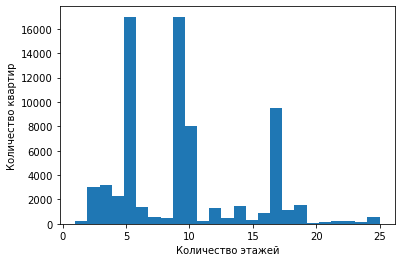

In [623]:
plt.xlabel("Количество этажей")
plt.ylabel("Количество квартир")
plt.hist(df.Floors,  bins=len(df.Floors.unique()));

Как мы видим, больше всего домов у которых 5, 9 и 17 этажей

## Распределение типов квартир (Type)

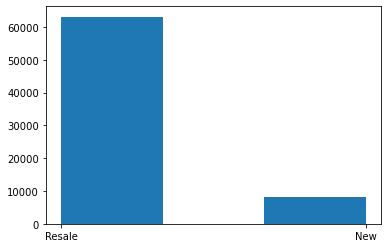

In [624]:
plt.hist(df.Type, bins=3);

Как мы видим, количество новых квартир гораздо меньше  

## Pаспределение типов домов (Building)

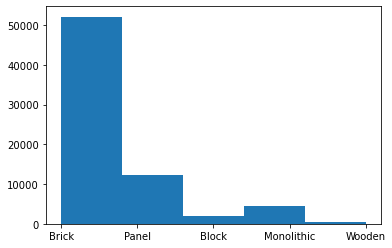

In [625]:
plt.hist(df.Building, bins=5);

Кирпичных домов оказалось больше всего

## Распределение количества комнат (Rooms)

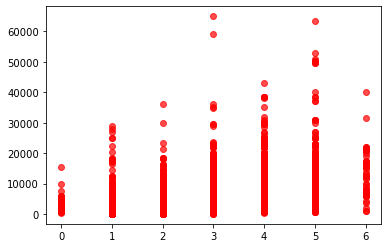

In [626]:
plt.scatter(df.Rooms, y=df.Price, c='red', alpha=0.7);

Как мы видим, у квартир, в которых три комнаты, есть аномальные стоимости

Посмотрим внимательнее на них

In [627]:
df.sort_values(by='Price', ascending=False).head(10)

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
43881,65000.0,347,56.328124,44.021276,Resale,6.0,Brick,3.0,5.0,180.0
2837,63504.3,246,56.312300,43.997154,Resale,5.0,Brick,5.0,3.0,280.0
34786,59000.0,208,56.346996,43.874435,New,17.0,Brick,3.0,14.0,91.0
32549,52800.0,234,56.324755,43.999411,Resale,5.0,Brick,5.0,5.0,264.0
13061,51000.0,340,56.324755,43.999429,New,5.0,Monolithic,5.0,4.0,320.4
35646,50160.0,236,56.324755,43.999411,Resale,5.0,Brick,5.0,4.0,330.0
7271,50160.0,177,56.324755,43.999411,Resale,5.0,Brick,5.0,4.0,330.0
59118,50000.0,363,56.324755,43.999411,Resale,5.0,Brick,5.0,4.0,327.0
50263,49704.0,306,56.324755,43.999411,Resale,5.0,Brick,5.0,4.0,330.0
6570,49500.0,65,56.329037,44.014797,Resale,8.0,Brick,5.0,7.0,549.0


У первой квартиры большая площадь, из-за этого она такая дорогая

А вот у третьей маленькая площадь и она находится далеко от центра, удалим её 

## Распределение широты(Lat) и долготы(Lng)

Посмотрим как распределены квартиры по долготе и широте

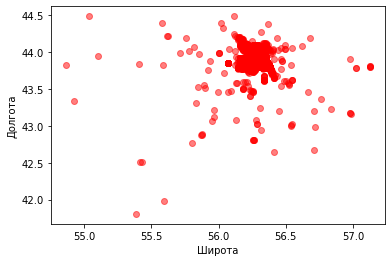

In [628]:
plt.xlabel("Широта")
plt.ylabel("Долгота")
plt.scatter(df.Lat, y=df.Lng, c='red', alpha=0.5)

Как мы можем заметить, почти у всех квартир широта в диапазоне (55.7, 56.6), а долгота в диапазоне (43.3, 44.5)

Найдем медианы у этих параметров

In [629]:
print(f"Широта: {df.Lat.median()}")
print(f"Долгота: {df.Lng.median()}")

Широта: 56.30046
Долгота: 43.9319726271


Посмотрим на карте, что это за точка

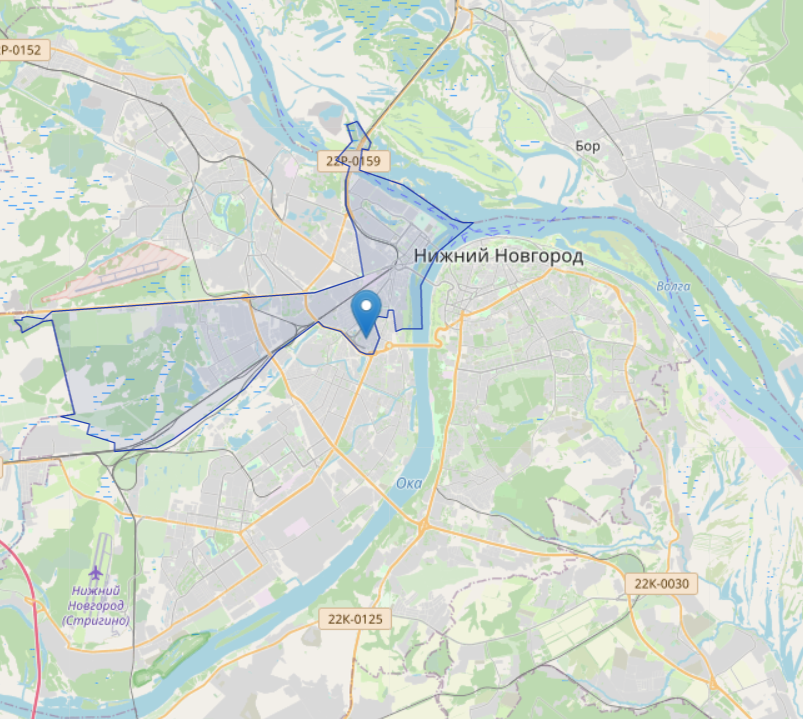

Этой точкой оказался Нижний Новгород

Найдем квартиры с максимальной и минимальной широтой

In [630]:
df[df.Lat.max() == df.Lat]

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
57571,1800.0,293,57.127867,43.80462,Resale,2.0,Brick,3.0,1.0,55.0


In [631]:
df[df.Lat.min() == df.Lat]

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
45384,800.0,286,54.862751,43.823485,Resale,5.0,Brick,2.0,4.0,48.8


Найдем квартиры с максимальной и минимальной долготой

In [632]:
df[df.Lng.max() == df.Lng]

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
22845,980.0,190,55.033063,44.485489,New,2.0,Panel,2.0,2.0,69.0


In [633]:
df[df.Lng.min() == df.Lng]

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
17291,1500.0,110,55.38564,41.80647,Resale,2.0,Brick,2.0,1.0,43.0


### Все квартиры находятся в данном квадрате

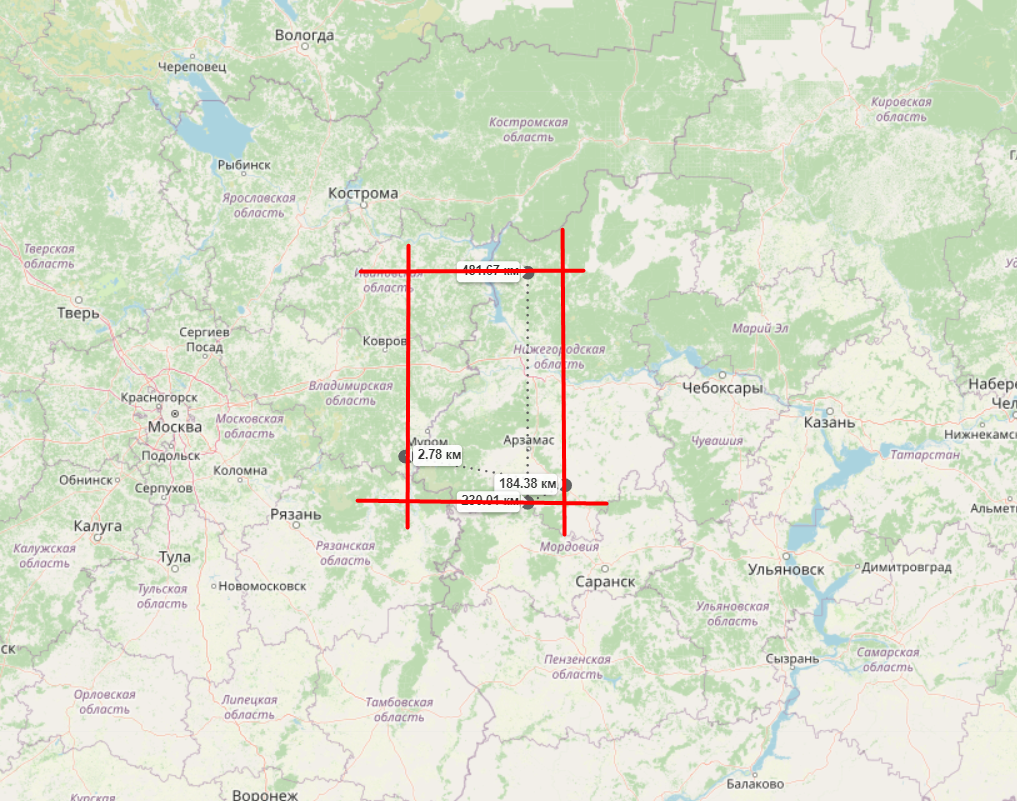

## Кодирование категориальных признаков

В нашем датасете есть два столбца с категориальными признаками Type и Building

Закодируем их числами

In [634]:
df_encoded = df 

label_encoder_building = LabelEncoder()
label_encoder_type = LabelEncoder()

df_encoded['Building'] = label_encoder_building.fit_transform(df_encoded['Building'])
df_encoded['Type'] = label_encoder_type.fit_transform(df_encoded['Type'])

# Создание новых признаков

In [635]:
df_encoded.head()

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
0,3500.0,240,56.365696,43.820250,1,9.0,1,3.0,4.0,60.0
1,4000.0,240,56.323057,44.007862,1,3.0,1,3.0,3.0,57.0
2,2150.0,240,56.267552,43.892107,1,5.0,3,2.0,1.0,38.0
3,3100.0,240,56.359963,43.813756,1,5.0,3,4.0,2.0,59.0
4,3585.0,240,56.325374,43.937463,1,9.0,3,2.0,7.0,52.5


## Расстояние от центра Нижнего Новгорода до квартиры

In [636]:
center_coords = [56.3287, 44.002]

In [637]:
df_new = df_encoded

df_new['Distance'] = df_new.apply(lambda x: GC(center_coords, [x.Lat, x.Lng]).km, axis=1)

## Тип удаленности квартиры от центра

In [638]:
def distance_type(dist):
    if dist < 3:
        return 0
    if dist < 5:
        return 1
    if dist < 10:
        return 2
    return 3

In [639]:
df_new['Distance_Type'] = df_new['Distance'].apply(distance_type)

## Тип размера квартиры от площади

In [640]:
def area_type(area):
    if area < 60:
        return 0
    if area < 130:
        return 1
    if area < 200:
        return 2
    return 3

In [641]:
df_new['Area_Type'] = df_new['Area'].apply(area_type)

## Тип жилого помещения

In [642]:
def living_type(floors):
    if floors <= 2:
        return 0
    return 1

In [643]:
df_new['Living_Type'] = df_new['Floors'].apply(living_type)

## Район жилого помещения

In [644]:
# ------------Районы Нижнего Новгорода------------------

Sormovski1 = [(56.403881, 43.878083), (56.352589, 43.738031)]
Sormovski2 = [(56.351061, 43.824047), (56.317745, 43.655323)]

Moskovski1 = [(56.351978, 43.922193), (56.311629, 43.75347)]
Moskovski2 = [(56.350145, 43.671865), (56.330892, 43.551111)]

Kanavinski1 = [(56.342811, 43.979042), (56.305142, 43.921595)]
Kanavinski2 = [(56.314271, 43.903785), (56.278784, 43.774124)]

Leninski = [(56.310112, 43.96297), (56.253351, 43.900774)]

Avtozavodski = [(56.282897, 43.924619), (56.197101, 43.715644)]

Nizhegorodski1 = [(56.33439, 44.033964), (56.312041, 43.967224)]
Nizhegorodski2 = [(56.324298,  44.098971), (56.271154, 44.0552)]

Sovetski1 = [(56.315646, 44.039598), (56.283425, 43.970258)]
Sovetski2 = [(56.27741, 44.069501), (56.249731, 44.041331)]

Priokski = [(56.273696, 44.028574), (56.222409, 43.908095)]

Bor1 = [(56.357444, 44.198334), (56.337065, 44.078468)]
Bor2 = [(56.419675, 44.070694), (56.359425, 43.889518)]

#------------------Остальные города----------------------------

Murom = [(55.628618, 42.139413), (55.494007, 41.93826)]

Bogorodsk = [(56.154205, 43.602932), (56.077135, 43.436888)]

Dzerzhinsk = [(56.280394, 43.532708), (56.18775, 43.34738)]

In [645]:
districts = {
    'Sormovski': [Sormovski1, Sormovski2],
    'Moskovski': [Moskovski1, Moskovski2],
    'Kanavisnki1': [Kanavinski1, Kanavinski2],
    'Leninski': [Leninski],
    'Avtozavodski': [Avtozavodski],
    'Nizhegorodski': [Nizhegorodski1, Nizhegorodski2],
    'Sovetski': [Sovetski1, Sovetski2],
    'Priokski': [Priokski],
    'Bor': [Bor1, Bor2],
    'Murom': [Murom],
    'Bogorodsk': [Bogorodsk],
    'Dzerzhinsk': [Dzerzhinsk]
}

In [646]:
def district_check(x, y):
    for district in districts.items(): 
        for i in range(len(district[1])):
            if ((x <= district[1][i][0][0] and y <= district[1][i][0][1]) and (x >= district[1][i][1][0] and y >= district[1][i][1][1])):
                return district[0]
    return 'Another'        

In [647]:
df_new['Districts'] = df_new.apply(lambda x: district_check(x.Lat, x.Lng), axis=1)

In [648]:
df_new.Districts.unique()

array(['Sormovski', 'Nizhegorodski', 'Avtozavodski', 'Kanavisnki1',
       'Moskovski', 'Sovetski', 'Another', 'Priokski', 'Leninski',
       'Dzerzhinsk', 'Bogorodsk', 'Bor', 'Murom'], dtype=object)

In [649]:
label_encoder_type = LabelEncoder()

df_new['Districts'] = label_encoder_building.fit_transform(df_new['Districts'])

## Посмотрим таблицу корреляции 

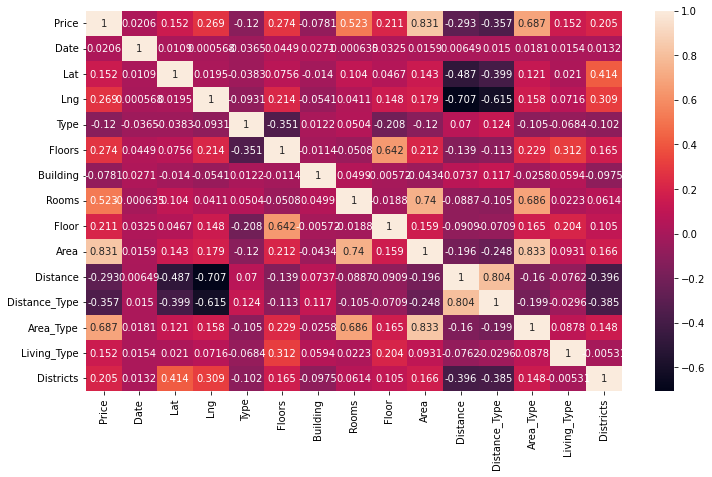

In [650]:
plt.subplots(figsize=(12, 7))
sns.heatmap(df_new.corr(), annot=True, fmt='.3g');

Как мы видим, признаки Floors, Rooms, Area и Distance имеют сильную корреляцию с целевым признаком

# Построение моделей

### Разбиение выборки

In [651]:
train = df_new.drop('Price', axis=1)
test = df_new['Price']

In [652]:
X_train, X_test, y_train, y_test = train_test_split(train,test, test_size=0.3, random_state=123)

### Ridge

In [653]:
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("r2 score: " + str(r2_score(y_test, y_pred)))
print("mean absolute error: " + str(mean_absolute_error(y_test, y_pred)))
print("mean squared error: " +  str(mean_squared_error(y_test, y_pred)))
print("mean absolute percentage error: " + str(mean_absolute_percentage_error(y_test, y_pred)))

r2 score: 0.7576315422415344
mean absolute error: 532.3963290012458
mean squared error: 1193711.4030984927
mean absolute percentage error: 0.7005588782563322


### KNeighborsRegressor

In [654]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("r2 score: " + str(r2_score(y_test, y_pred)))
print("mean absolute error: " + str(mean_absolute_error(y_test, y_pred)))
print("mean squared error: " +  str(mean_squared_error(y_test, y_pred)))
print("mean absolute percentage error: " + str(mean_absolute_percentage_error(y_test, y_pred)))

r2 score: 0.7705333706402285
mean absolute error: 482.4730125310465
mean squared error: 1130167.4096977953
mean absolute percentage error: 0.706662237766474


### Lasso

In [655]:
model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("r2 score: " + str(r2_score(y_test, y_pred)))
print("mean absolute error: " + str(mean_absolute_error(y_test, y_pred)))
print("mean squared error: " +  str(mean_squared_error(y_test, y_pred)))
print("mean absolute percentage error: " + str(mean_absolute_percentage_error(y_test, y_pred)))

r2 score: 0.7575090220295175
mean absolute error: 531.5085512381124
mean squared error: 1194314.8387746823
mean absolute percentage error: 0.6979019498104211


### RandomForestRegressor

In [656]:
model = RandomForestRegressor(random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("r2 score: " + str(r2_score(y_test, y_pred)))
print("mean absolute error: " + str(mean_absolute_error(y_test, y_pred)))
print("mean squared error: " +  str(mean_squared_error(y_test, y_pred)))
print("mean absolute percentage error: " + str(mean_absolute_percentage_error(y_test, y_pred)))

r2 score: 0.9038380862511854
mean absolute error: 276.2089720248714
mean squared error: 473615.97316482564
mean absolute percentage error: 0.5628085405274283


### CatBoostRegressor

In [657]:
model = CatBoostRegressor()
model.fit(X_train,y_train, verbose=False)
y_pred = model.predict(X_test)
print("r2 score: " + str(r2_score(y_test, y_pred)))
print("mean absolute error: " + str(mean_absolute_error(y_test, y_pred)))
print("mean squared error: " +  str(mean_squared_error(y_test, y_pred)))
print("mean absolute percentage error: " + str(mean_absolute_percentage_error(y_test, y_pred)))

r2 score: 0.8923539502378349
mean absolute error: 344.87895833869095
mean squared error: 530177.5581196308
mean absolute percentage error: 0.5869543635864495


### XGBRegressor

In [658]:
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("r2 score: " + str(r2_score(y_test, y_pred)))
print("mean absolute error: " + str(mean_absolute_error(y_test, y_pred)))
print("mean squared error: " +  str(mean_squared_error(y_test, y_pred)))
print("mean absolute percentage error: " + str(mean_absolute_percentage_error(y_test, y_pred)))

r2 score: 0.8951778808801998
mean absolute error: 338.0166139826723
mean squared error: 516269.1550191356
mean absolute percentage error: 0.5724849504569174


Лучшими моделями оказались: RandomForestRegressor, CatBoostRegressor и XGBRegressor

## Подбор гиперпараметров для лучших моделей

### RandomForestRegressor

In [659]:
forest_params = {
    'max_depth': [None, 3]
}

forest = RandomForestRegressor(random_state=123)

clf = GridSearchCV(forest, forest_params, cv=5)

In [660]:
best_model = clf.fit(X_train, y_train)

In [661]:
y_pred = best_model.predict(X_test)
print("r2 score: " + str(r2_score(y_test, y_pred)))
print("mean absolute error: " + str(mean_absolute_error(y_test, y_pred)))
print("mean squared error: " +  str(mean_squared_error(y_test, y_pred)))
print("mean absolute percentage error: " + str(mean_absolute_percentage_error(y_test, y_pred)))

r2 score: 0.9038380862511854
mean absolute error: 276.2089720248714
mean squared error: 473615.97316482564
mean absolute percentage error: 0.5628085405274283


### CatBoostRegressor

In [662]:
cat_params = {
    'n_estimators':[500, 1000]
}

cat = CatBoostRegressor()

clf = GridSearchCV(cat, cat_params, cv = 5)

In [663]:
best_model = clf.fit(X_train, y_train, verbose=False)

In [664]:
y_pred = best_model.predict(X_test)
print("r2 score: " + str(r2_score(y_test, y_pred)))
print("mean absolute error: " + str(mean_absolute_error(y_test, y_pred)))
print("mean squared error: " +  str(mean_squared_error(y_test, y_pred)))
print("mean absolute percentage error: " + str(mean_absolute_percentage_error(y_test, y_pred)))

r2 score: 0.8923539502378349
mean absolute error: 344.87895833869095
mean squared error: 530177.5581196308
mean absolute percentage error: 0.5869543635864495


### XGBRegressor

In [665]:
parameters = {
    'n_estimators': [500, 1000]
}

xgb = XGBRegressor()

clf = GridSearchCV(xgb, parameters, cv = 5)

In [666]:
best_model = clf.fit(X_train, y_train)

In [667]:
y_pred = best_model.predict(X_test)
print("r2 score: " + str(r2_score(y_test, y_pred)))
print("mean absolute error: " + str(mean_absolute_error(y_test, y_pred)))
print("mean squared error: " +  str(mean_squared_error(y_test, y_pred)))
print("mean absolute percentage error: " + str(mean_absolute_percentage_error(y_test, y_pred)))

r2 score: 0.8970927883373861
mean absolute error: 310.9007624055979
mean squared error: 506837.8664403233
mean absolute percentage error: 0.5779525349205377


Попробуем убрать одну подозрительную квартиру, и посмотрим, какой будет результат

In [670]:
df_new.sort_values(by='Price', ascending=False).head(20)

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area,Distance,Distance_Type,Area_Type,Living_Type,Districts
43881,65000.0,347,56.328124,44.021276,1,6.0,1,3.0,5.0,180.00,1.190092,0,2,1,9
2837,63504.3,246,56.312300,43.997154,1,5.0,1,5.0,3.0,280.00,1.847920,0,3,1,9
34786,59000.0,208,56.346996,43.874435,0,17.0,1,3.0,14.0,91.00,8.121374,2,1,1,7
32549,52800.0,234,56.324755,43.999411,1,5.0,1,5.0,5.0,264.00,0.466803,0,3,1,9
13061,51000.0,340,56.324755,43.999429,0,5.0,2,5.0,4.0,320.40,0.466425,0,3,1,9
35646,50160.0,236,56.324755,43.999411,1,5.0,1,5.0,4.0,330.00,0.466803,0,3,1,9
7271,50160.0,177,56.324755,43.999411,1,5.0,1,5.0,4.0,330.00,0.466803,0,3,1,9
59118,50000.0,363,56.324755,43.999411,1,5.0,1,5.0,4.0,327.00,0.466803,0,3,1,9
50263,49704.0,306,56.324755,43.999411,1,5.0,1,5.0,4.0,330.00,0.466803,0,3,1,9
6570,49500.0,65,56.329037,44.014797,1,8.0,1,5.0,7.0,549.00,0.789816,0,3,1,9


In [671]:
df_without_apartment = df_new

df_without_apartment = df_without_apartment.drop(34786).reset_index(drop=True)

In [672]:
train = df_without_apartment.drop('Price', axis=1)
test = df_without_apartment['Price']

In [673]:
X_train, X_test, y_train, y_test = train_test_split(train,test, test_size=0.3, random_state=123)

In [674]:
model = RandomForestRegressor(random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("r2 score: " + str(r2_score(y_test, y_pred)))
print("mean absolute error: " + str(mean_absolute_error(y_test, y_pred)))
print("mean squared error: " +  str(mean_squared_error(y_test, y_pred)))
print("mean absolute percentage error: " + str(mean_absolute_percentage_error(y_test, y_pred)))

r2 score: 0.8825644279108982
mean absolute error: 283.4811901948629
mean squared error: 577057.1188722159
mean absolute percentage error: 0.8845342081967995


In [676]:
model = CatBoostRegressor()
model.fit(X_train,y_train, verbose=False)
y_pred = model.predict(X_test)
print("r2 score: " + str(r2_score(y_test, y_pred)))
print("mean absolute error: " + str(mean_absolute_error(y_test, y_pred)))
print("mean squared error: " +  str(mean_squared_error(y_test, y_pred)))
print("mean absolute percentage error: " + str(mean_absolute_percentage_error(y_test, y_pred)))

r2 score: 0.8761465663969366
mean absolute error: 351.0629358428804
mean squared error: 608593.3272687453
mean absolute percentage error: 0.8680302472277007
